In [1]:
import numpy as np

In [2]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이가 50, 무게는 ??

#### 예측 :  회귀(regressor)
#### 분류 : 분류(class)
#### EDA(탐색적 데이터 분석) (80~90%) --> 데이터(학습용/검증용) --> 적절한 머신러닝 선택 --> 평가(평균제곱오차) & score 데이터
#### - 시간이 오래 걸림


In [6]:
from sklearn.model_selection import train_test_split
train, test, train_target, test_target = train_test_split(length, weight, random_state=42)
# 입력데이터 차수 변경하기
train = train.reshape(-1,1)
test = test.reshape(-1,1)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 이웃의 개수 : 3
knr.fit(train, train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
train.shape # 2차원

(42, 1)

In [16]:
knr.predict([[50]])

array([1033.33333333])

In [18]:
# 시각화를 통해 K 최근접 이웃 알고리즘을 적용한 값을 시각화 함

In [19]:
distance, indexes = knr.kneighbors([[50]])
distance, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

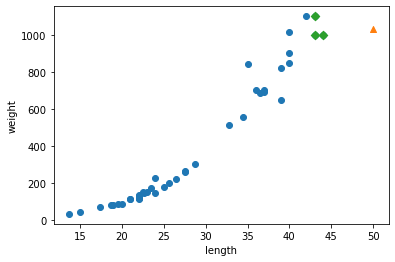

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train, train_target)
plt.scatter(50, 1033, marker='^')
plt.scatter(train[indexes], train_target[indexes], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 객체명이 가려짐

In [26]:
knr.predict([[100]])

array([1033.33333333])

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train, train_target)

LinearRegression()

In [44]:
lr.predict([[100]])

array([3192.69585141])

In [38]:
lr.predict([[8]])

array([-396.88148524])

In [39]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.018644953547)

### 선형 회귀 시각화

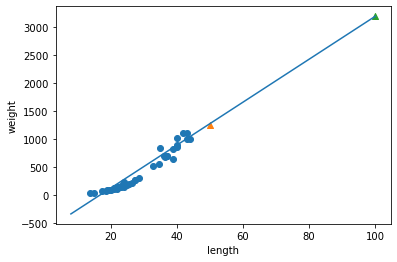

In [68]:
plt.scatter(train, train_target)
plt.scatter(50, 1241.83860323, marker='^')
plt.scatter(100,3192.69585141, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.plot([8,100], [-339.88148524, 3192.69585141])
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error
lr_predict = lr.predict(train)
mean_absolute_error(train_target, lr_predict)

64.89383276543603

### 선형 방정식의 문제점은 직선이기 때문에 음수가 나올 수 있음...
### 그리고 값이 크거나 작을수록 변동폭이 큼 (정확한 값을 반영하기 힘듦)...

## 다항 회귀

In [48]:
# np.column_stack의 기능
a = np.array((1,2,3))
b = np.array((2,3,4))

# 1)
np.column_stack((a,b)) # a와 b를 하나의 리스트로 묶어줌

# 2) 컴프리헨션과 zip 함수를 이용하여 쌍으로 묶어 반환 
temp = [[i,j] for i,j in zip(a,b)]
np.array(temp)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [49]:
train_poly = np.column_stack((train**2, train)) 
test_poly = np.column_stack((test**2, test))

In [50]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [51]:
# 훈련
lr.fit(train_poly, train_target)

LinearRegression()

In [59]:
# 예측
lr.predict([[50**2, 50]])

array([1573.98423528])

In [60]:
# y = ax(제곱) + bx + c 
# - 위 값이 a, b, c 순서로 출력됨
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.05021078278293)

In [63]:
lr.coef_[0]*(50**2) + lr.coef_[1]*50 + lr.intercept_
# lr.predict([[50**2, 50]]) 와 동일한 값 출력

1573.9842352827402

## 다형 회귀에 대한 시각화

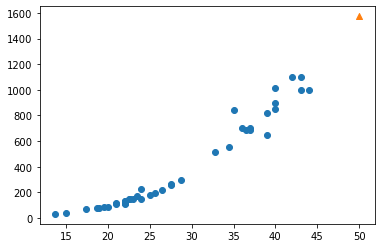

In [69]:
plt.scatter(train, train_target)
plt.scatter(50, 1573.9842352827402, marker='^')

## 방정식 그래프로 그리기

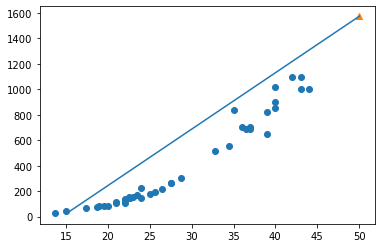

In [72]:
# 직선
plt.scatter(train, train_target)
plt.scatter(50, 1573.9842352827402, marker='^')
plt.plot([15, 50], [lr.predict([[15**2, 15]]), lr.predict([[50**2, 50]])])

In [79]:
point = np.arange(15, 50)
lr.coef_[0] * (point ** 2) + lr.coef_[1] * point + lr.intercept_

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

In [82]:
lr.predict([[i**2,i] for i in point])

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

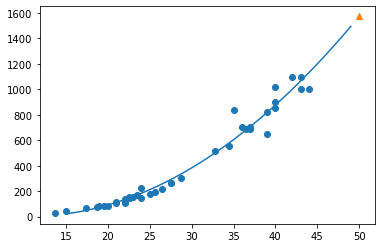

In [84]:
# 곡선
point = np.arange(15, 50)
plt.scatter(train, train_target)
plt.scatter(50, 1573.9842352827402, marker='^')
plt.plot(point, lr.predict([[i**2,i] for i in point]))

### 길이에 따른 무게가 마이너스가 나오는 오류 (직선의 방정식)을 곡선의 방정식으로 변환하면서 문제점 해결

In [86]:
# 머신러닝은 x값이 주어지면 y값이 어떤 값이든 좌표상 데이터가 출력된다.
# y = ax + b (1차원 방정식)
# 두 개의 값이 주어졌을 때
# y = ax(제곱) + bx + c

# 결국 x의 값을 가지고 y의 값을 유추한 것이 선형 회귀 방식
# 그런데 이 방식은 범위를 벗어나면 경우에 따라 마이너스값을 가질 가능성이 있음
# 우리가 구해야 할 값은 '무게'이고 무게는 기본적으로 마이너스값을 가질 수 없으므로
# 곡선으로 그려주어 이 문제점을 해결한 것임
# x값이 하나의 값밖에 없기 때문에 2차원 형태의 넘파이 배열을 만들기 위해 (즉 조금 더 정확한 값을 반영해 주기 위해)
# 기존의 값을 가지고 위와 같은 식을 작성한 것
# 항이 여러개이기 때문에 다항 회귀인 것

# ... 3차, 4차, 5차까지도 그래프 생성 가능...그러나 차수를 너무 늘리면 과적합이 일어날 수 있음